In [34]:
import pandas as pd

df = pd.read_csv("./../local-data/wifi_map_6-10-2025_19_19_26_home_consum.csv", sep=";")

times = df["Time from start (seconds)"].unique()

# splitting the data base on same moment adquisition
subsets = []
for tm in times:
    sub = df.loc[df["Time from start (seconds)"] == tm]
    subsets.append(sub)
subsets[1]

,AP hash,Distance (meters),AP auth mode,Time from start (seconds)
11,f8a4985c,0.56,3,10
12,2d2facaa,9.09,3,10
13,394d4b0b,31.62,3,10
14,eb77764e,42.17,3,10
15,2e41b0ed,46.42,4,10
16,bab9b9a6,56.23,3,10
17,58d968cb,56.23,4,10
18,330695ec,61.90,0,10
19,7b2695be,61.90,4,10
20,6cb4288c,61.90,4,10


In [2]:
# get an array holding all the nearest APs
nearests_uniq = []
for sub in subsets:
    ap_hash = sub.iloc[0, 0]
    if len(nearests_uniq) == 0:
        nearests_uniq.append(ap_hash)
    else:
        if ap_hash not in nearests_uniq:
            nearests_uniq.append(ap_hash)
nearests_uniq

['f8a4985c',
 '394d4b0b',
 '2d2facaa',
 '2e41b0ed',
 '7b2695be',
 '163976e1',
 '9669d9a2',
 '427291b2',
 '4427ba31',
 '5e530b88',
 '432991f',
 '2c5f477a',
 'abe24d56',
 'd23a1d38',
 'd5dde450',
 '523ecfa4',
 '797617cf',
 '286a2ffb',
 '6b369a29',
 '46d2aec2',
 '36d13bd',
 '7f3d6552',
 'a22130e6',
 'fdd1db11',
 '433e2f6a',
 'acf8fb78',
 '1836123a',
 'f1919773',
 'd8c1524d',
 'b81cee1e',
 '9f03c406',
 '939ea8fd']

In [32]:
# get all data related with the nearest APs
interest_aps = []
for closer in nearests_uniq:
    interest_aps.append(df.loc[df["AP hash"] == closer])
interest_aps

[      AP hash  Distance (meters)  AP auth mode  Time from start (seconds)
 0    f8a4985c               0.62             3                          7
 11   f8a4985c               0.56             3                         10
 28   f8a4985c               1.78             3                         14
 45   f8a4985c               2.61             3                         18
 59   f8a4985c               3.48             3                         21
 72   f8a4985c               3.83             3                         25
 85   f8a4985c               5.62             3                         28
 97   f8a4985c               4.64             3                         32
 112  f8a4985c               4.22             3                         35
 129  f8a4985c               4.22             3                         39
 144  f8a4985c               5.62             3                         43
 155  f8a4985c               3.83             3                         46
 168  f8a4985c           

In [4]:
# calculating the total distance walked

walked_distance = 0
time = 0
for i, aps in enumerate(interest_aps):
    if i == 0:
        walked_distance += interest_aps[i].tail(1).iloc[0, 1]
        time = interest_aps[i].tail(1).iloc[0, 3]
    else:
        row = interest_aps[i].loc[df["Time from start (seconds)"] == time]
        if not row.empty:
            latest_row = interest_aps[i].tail(1)
            time = latest_row.iloc[0, 3]
            start_dst = row.iloc[0, 1]
            end_dst = latest_row.iloc[0, 1]
            delta_dst = abs(start_dst - end_dst)
            walked_distance += delta_dst
            if len(interest_aps) - 1 == i:
                walked_distance += end_dst

(walked_distance, time)

(np.float64(192.04999999999998), np.int64(277))

In [5]:
# drawing for the revelant APs the distance on time
# commented since seems that is very memory consuming

# for i_ap in interest_aps:
#     i_ap.plot.scatter(
#     x="Time from start (seconds)",
#     y="Distance (meters)",
#     grid=True,
#     title=i_ap.iloc[0,0],
#     figsize=(2,3))

<Axes: title={'center': '7b2695be'}, xlabel='Time from start (seconds)', ylabel='Distance (meters)'>

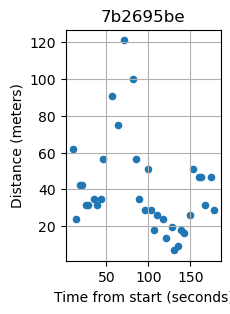

In [6]:
# drawing for the revelant AP the distance on time
i = 4
interest_aps[i].plot.scatter(
    x="Time from start (seconds)",
    y="Distance (meters)",
    grid=True,
    title=interest_aps[i].iloc[0, 0],
    figsize=(2, 3),
)

In [31]:
# APs on time frames to draw circles
for sub in subsets:
    for i, ap in sub.iterrows():
        if i > 0:
            print(ap)
    print("=== === ===")
    print("===     ===")
    print("=== === ===")

AP hash                      bab9b9a6
Distance (meters)               21.54
AP auth mode                        3
Time from start (seconds)           7
Name: 1, dtype: object
AP hash                      2d2facaa
Distance (meters)               21.54
AP auth mode                        3
Time from start (seconds)           7
Name: 2, dtype: object
AP hash                      2e41b0ed
Distance (meters)               23.71
AP auth mode                        4
Time from start (seconds)           7
Name: 3, dtype: object
AP hash                      f81b53a0
Distance (meters)               42.17
AP auth mode                        3
Time from start (seconds)           7
Name: 4, dtype: object
AP hash                      f81b53a0
Distance (meters)               82.54
AP auth mode                        3
Time from start (seconds)           7
Name: 5, dtype: object
AP hash                      287de1e8
Distance (meters)               90.85
AP auth mode                        3
Time from s